In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

# Superfluid Weight at T=0K
- get superfluid weight tensor $D$ and $D_s(0)=\sqrt{det D}$
- $D_{\mu, \nu}^s=\sum_{\vec{k},i,j}\frac{n(E_j)-n(E_i)}{E_i-E_j}(\langle\Psi_i|\partial_{\mu}H|\Psi_j\rangle\langle\Psi_j|\partial_{\nu}H|\Psi_i\rangle-\langle\Psi_i|\partial_{\mu}H\gamma^z|\Psi_j\rangle\langle\Psi_j|\gamma^z\partial_{\nu}H|\Psi_i\rangle)$
    - $\implies D_{\mu, \nu}^s=\sum \text{prefactor}\times(\text{diamagnetic part}-\text{paramagnetic part})$
    - plot contribution of prefactor, diamagnetic and paramagnetic term over k-space (0 to 2pi) for any energy pair


In [32]:
N=1
n = N**2
ham = hamiltonian.SquareLatticeModel(delta=np.ones(n), T=0.0, ns=np.ones(n), nu=0, U=np.ones(n), mu=-np.ones(n)/2)
dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=41,HF=True, alpha=0.3, Nmin=10, Nmax=1200)

In [33]:
Earr=np.linspace(-3,3,1000, endpoint=False)
nE = np.zeros((5,1000))
c=0
for T in np.linspace(0,0.01,5):
    for i, E in enumerate(Earr):
        nE[c,i] = sf.fermidirac(E, T, o=1)
    c+=1

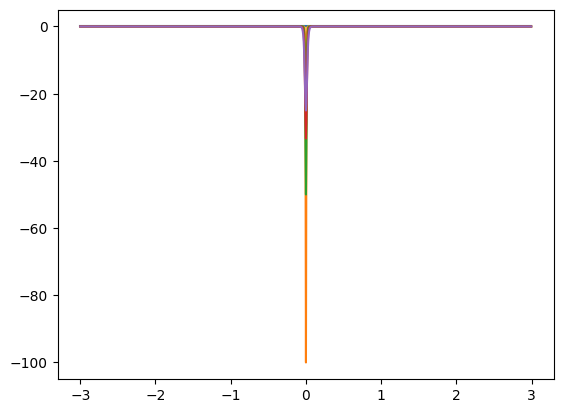

In [34]:
for i in range(5):
    plt.plot(Earr, nE[i,:])

In [29]:
nus

array([[1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
        1.00000002+0.j, 0.99999997+0.j, 0.99999962+0.j, 0.99999925+0.j,
        0.99999944+0.j, 1.00000044+0.j, 1.00000216+0.j, 1.00000429+0.j,
        1.00000652+0.j, 1.00000864+0.j, 1.00001052+0.j, 1.0000121 +0.j,
        1.00001338+0.j, 1.00001441+0.j, 1.0000152 +0.j, 1.00001582+0.j,
        1.00001628+0.j, 1.00001663+0.j, 1.0000169 +0.j, 1.00001709+0.j,
        1.00001724+0.j, 1.00001735+0.j, 1.00001742+0.j, 1.00001748+0.j,
        1.00001753+0.j, 1.00001756+0.j, 1.00001758+0.j, 1.0000176 +0.j]])

In [30]:
s=41
sfw, term = sf.SFW(ham,s)
sfw

(0.2548974197567793+0j)

In [26]:
ham.nu

1

In [152]:
E=0.0005
T=0.00001
np.float64(1/(1+np.exp(E/T)))

1.928749847963918e-22

In [153]:
E/T

50.0

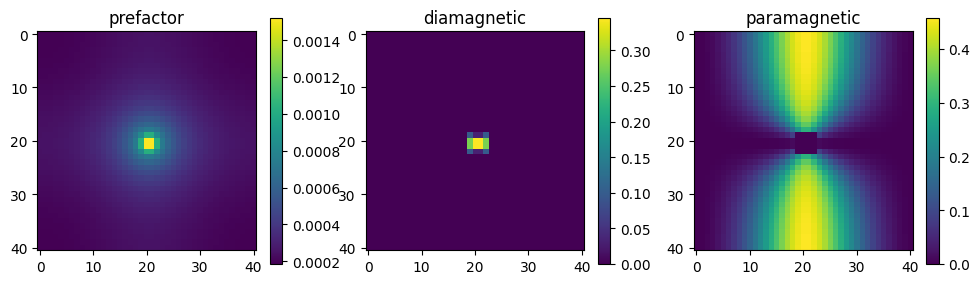

In [6]:
ep = 3 # energy pair 
pfgrid = term[:,0,ep].reshape(s,s)
diam = term[:,1,ep].reshape(s,s)
param = term[:,2,ep].reshape(s,s)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,16))
axes[0].set_title('prefactor')
axes[1].set_title('diamagnetic')
axes[2].set_title('paramagnetic')
ax0 = axes[0].imshow(np.abs(pfgrid))
ax1 = axes[1].imshow(np.abs(diam))
ax2 = axes[2].imshow(np.abs(param))
fig.colorbar(ax0, shrink=0.2)
fig.colorbar(ax1, shrink=0.2)
fig.colorbar(ax2, shrink=0.2)
plt.show()

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


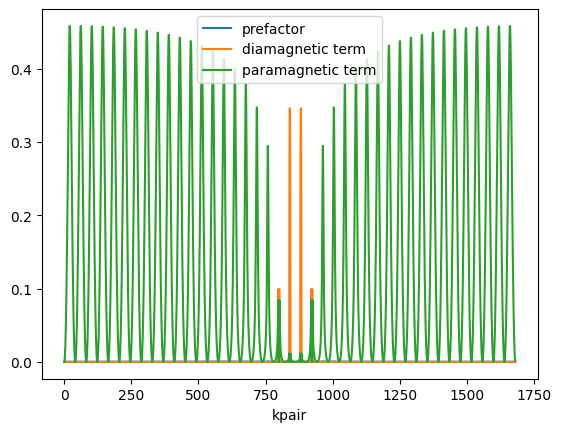

In [7]:
plt.xlabel('kpair')
plt.plot(term[:, 0, ep], label='prefactor')
plt.plot(term[:, 1, ep], label='diamagnetic term')
plt.plot(term[:, 2, ep], label='paramagnetic term')
plt.legend()

In [8]:
H = ham.get_HBdG()
k=np.linspace(0,2*np.pi,41)
E2 = np.zeros((ham.dim,41*41))
c = 0
for kx in k:
    for ky in k:
        E2[:,c] = np.linalg.eigh(H(kx,ky))[0]
        c+=1


s1=np.shape(E2)[0]
E2=E2.reshape(ham.dim,41,41)

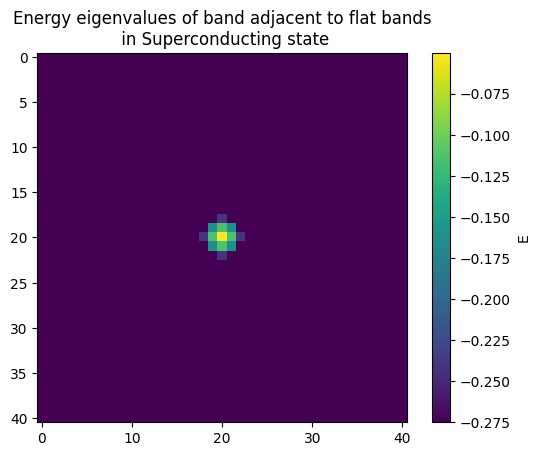

In [10]:
plt.title('Energy eigenvalues of band adjacent to flat bands\n in Superconducting state')
plt.imshow(E2[4,:,:])
plt.colorbar(label='E')

In [11]:
hamN = hamiltonian.dDSLmodel(N=N)

H = hamN.get_H0()
k=np.linspace(0,2*np.pi,41)
E2 = np.zeros((int(hamN.dim/4),41*41))
c = 0
for kx in k:
    for ky in k:
        E2[:,c] = np.linalg.eigh(H(kx,ky))[0]
        c+=1


s1=np.shape(E2)[0]
E2=E2.reshape(int(hamN.dim/4),41,41)

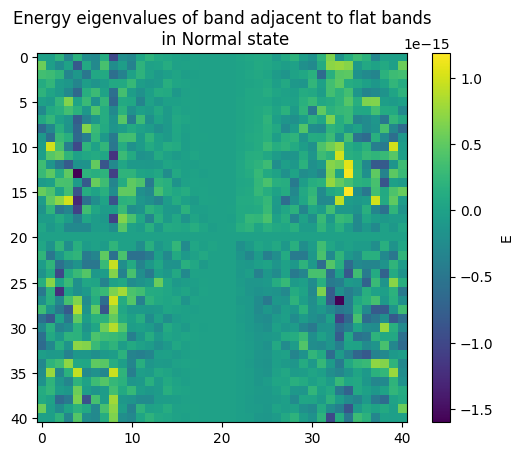

In [13]:
plt.title('Energy eigenvalues of band adjacent to flat bands\n in Normal state')
plt.imshow(E2[1,:,:])
plt.colorbar(label='E')

In [14]:
[(i,j) for i in range(26) for j in range(26)][int(26**2/2)+10]

(13, 10)

In [15]:
Earr = np.linspace(-3,3,101)
farr = []
dfarr = []
for i in Earr:
    farr.append(sf.fermidirac(i,0))
    dfarr.append(sf.fermidirac(i,0, o=1))

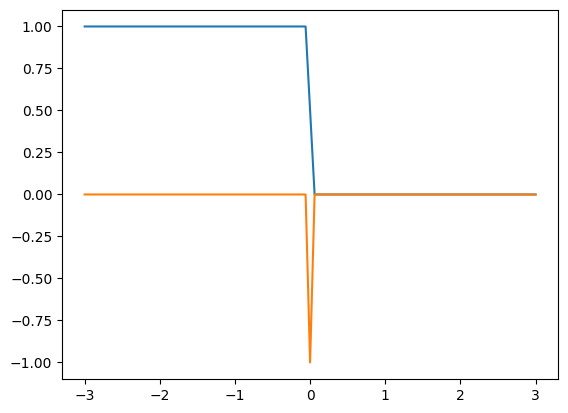

In [16]:
plt.plot(Earr, farr)
plt.plot(Earr, np.array(dfarr)/1e10)

# finite T

In [20]:
m=-0.5
N=2
delta = []
sfw = []
tarr = np.linspace(0,0.2,30)
for t in tarr:
    ham = hamiltonian.dDSLmodel(N=N, delta=[1,1,1], T=t, U=[1,1,1], nu=3, ns=[1,1,1], mu=[m,m,m])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=150, g=1e-6)
    ten, dsfw = sf.detSFW(ham,41)
    delta.append(dels[:,-1])
    sfw.append(dsfw)
    print(f"{t} is Done")

0.0 is Done


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

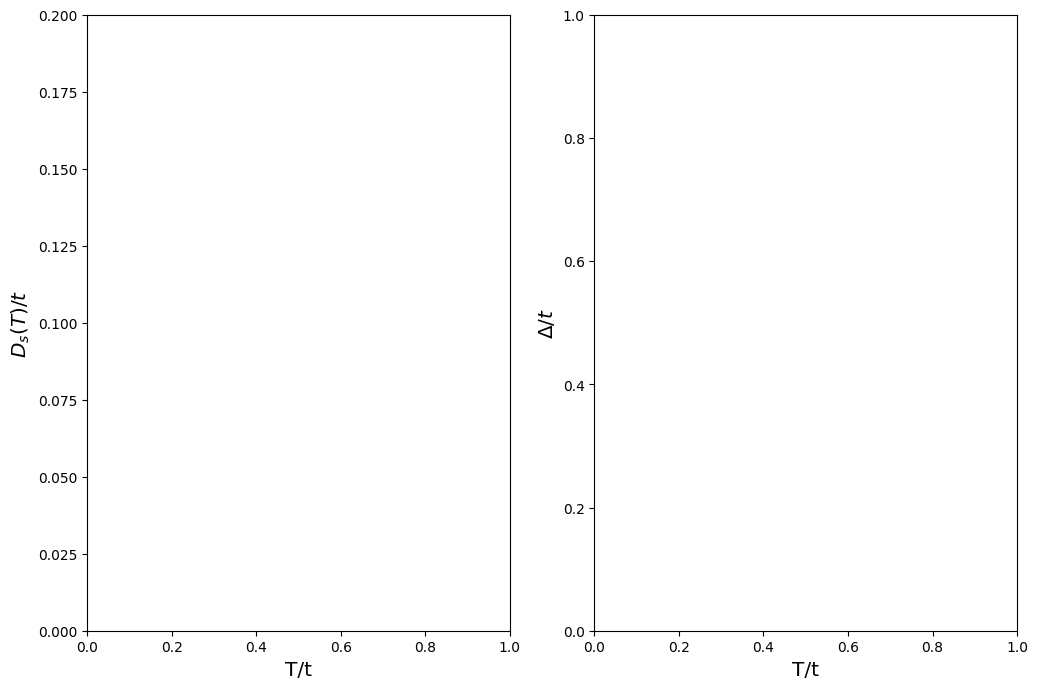

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,8))
axes[0].set_xlabel('T/t', size='x-large')
axes[1].set_xlabel('T/t', size='x-large')
axes[0].set_ylabel(r'$D_s(T)/t$', size='x-large')
axes[1].set_ylabel(r'$\Delta/t$', size='x-large')
axes[0].set_ylim(0,0.2)

axes[0].plot(tarr, sfw)
axes[0].plot(tarr, tarr*8/np.pi, linestyle='--', label=r'$\frac{8}{\pi}k_BT$')
axes[1].plot(tarr, delta, label=[r'$\Delta_B$',r'$\Delta_{A/C}$'])
axes[0].vlines(0.06, 0,0.2,linestyle='--', color='grey', label=r'expected $T_{BKT}=0.06$')

axes[0].legend(fontsize='large')
axes[1].legend(fontsize='x-large')
plt.show()